In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
 df = pd.read_csv('data.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [11]:
df.shape

(200, 2)

In [12]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [13]:
#gain insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    196 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [14]:
df.describe()

,study_hours,student_marks
count,196.000000,200.00000
mean,6.990867,77.93375
std,1.251866,4.92570
min,5.010000,68.57000
25%,5.782500,73.38500
50%,7.110000,77.71000
75%,8.082500,82.32000
max,8.990000,86.99000


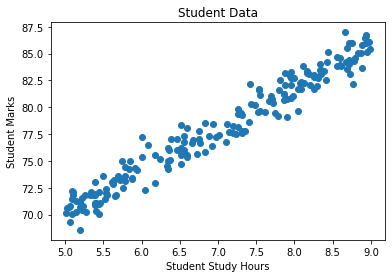

In [15]:
plt.scatter(x = df.study_hours , y=df.student_marks)
plt.title("Student Data")
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.show()

In [16]:
data.mean()

study_hours       6.990867
student_marks    77.933750
dtype: float64

In [17]:
data = data.fillna(data.mean())
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [18]:
X = data.drop(columns = 'student_marks')
y = data.drop(columns = 'study_hours')
X.shape , y.shape

((200, 1), (200, 1))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X, y , random_state=51 , test_size=0.2)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [30]:
lr.coef_

array([[3.9224222]])

In [23]:
lr.intercept_

array([50.56540424])

In [24]:
pred = lr.predict(X_test)
pred

array([[83.12150849],
       [78.92451674],
       [84.57280471],
       [85.82797981],
       [84.7297016 ],
       [80.76805518],
       [72.88398656],
       [71.7072599 ],
       [73.27622878],
       [71.7072599 ],
       [73.51157411],
       [76.41416653],
       [73.27622878],
       [73.62924677],
       [82.96461161],
       [70.45208479],
       [73.27622878],
       [78.76761985],
       [75.59045787],
       [82.69004205],
       [76.68873609],
       [70.53053324],
       [74.80597343],
       [77.98653751],
       [85.59263448],
       [82.57236939],
       [76.45339076],
       [85.04349537],
       [78.41460186],
       [81.39564273],
       [81.74866072],
       [83.16073272],
       [82.21935139],
       [81.12107317],
       [73.62924677],
       [71.19734501],
       [71.94260523],
       [81.55253961],
       [72.64864122],
       [71.98182945]])

In [26]:
pd.DataFrame(np.c_[X_test , y_test , pred] ,columns =[ 'Study hours' , 'Original Marks' , 'Predicted Marks'])

,Study hours,Original Marks,Predicted Marks
0,8.300000,82.02,83.121508
1,7.230000,77.55,78.924517
2,8.670000,84.19,84.572805
3,8.990000,85.46,85.827980
4,8.710000,84.03,84.729702
5,7.700000,80.81,80.768055
6,5.690000,73.61,72.883987
7,5.390000,70.90,71.707260
8,5.790000,73.14,73.276229
9,5.390000,73.02,71.707260


In [27]:
# Fine Tune Model
lr.score(X_test,y_test)

0.9512769934401469

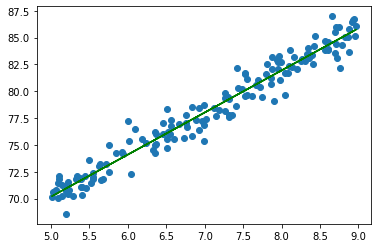

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train ,lr.predict(X_train) , color='g')

In [31]:
import joblib
joblib.dump(lr,'marks_predictor.pkl')

['marks_predictor.pkl']

In [32]:
model=joblib.load('marks_predictor.pkl')

In [33]:
model.predict([[5]])[0][0]

C:\Users\bipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.17751523789573